# AI_EEE205 - 5. Penguins

## Loading and describing the data

In [1]:
import numpy as np
import pandas as pd
# Load libraries
from palmerpenguins import load_penguins
from pandas import read_csv # an Excel csv file reader
from pandas.plotting import scatter_matrix # for a graph plot
from matplotlib import pyplot # more graphs
from sklearn.model_selection import train_test_split # split the data for traing and testing 
from sklearn.model_selection import cross_val_score # evaluate models
# The models and analysis tools
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
dataset = pd.DataFrame()
names = ['Species', 'Region', 'Island', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex']

dataset = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/1a19e36ba583887a4630b1f821e3a53d5a4ffb76/data-raw/penguins_raw.csv')

In [3]:
# check the dataset shape - should be 150 data points (examples) with 5 attributes. i.e. 5 variables that can describe each flower. 
print(dataset.shape)

(344, 17)


In [4]:
# The following allows you to print the "head" of the data to check the labels and see examples of the data
print(dataset.head(10)) # descriptions
print(dataset.describe())

  studyName  Sample Number                              Species  Region  \
0   PAL0708              1  Adelie Penguin (Pygoscelis adeliae)  Anvers   
1   PAL0708              2  Adelie Penguin (Pygoscelis adeliae)  Anvers   
2   PAL0708              3  Adelie Penguin (Pygoscelis adeliae)  Anvers   
3   PAL0708              4  Adelie Penguin (Pygoscelis adeliae)  Anvers   
4   PAL0708              5  Adelie Penguin (Pygoscelis adeliae)  Anvers   
5   PAL0708              6  Adelie Penguin (Pygoscelis adeliae)  Anvers   
6   PAL0708              7  Adelie Penguin (Pygoscelis adeliae)  Anvers   
7   PAL0708              8  Adelie Penguin (Pygoscelis adeliae)  Anvers   
8   PAL0708              9  Adelie Penguin (Pygoscelis adeliae)  Anvers   
9   PAL0708             10  Adelie Penguin (Pygoscelis adeliae)  Anvers   

      Island               Stage Individual ID Clutch Completion    Date Egg  \
0  Torgersen  Adult, 1 Egg Stage          N1A1               Yes  2007-11-11   
1  Torgersen  

In the example above change the number of data elements to see if you can find a different class of Iris.
The following is a really easy way to get some statistics of the data. 

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [6]:
# species distribution 
print(dataset.groupby('Species').size())

Species
Adelie Penguin (Pygoscelis adeliae)          152
Chinstrap penguin (Pygoscelis antarctica)     68
Gentoo penguin (Pygoscelis papua)            124
dtype: int64


## Data Visualisation 

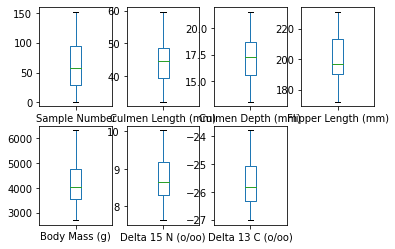

In [7]:
dataset.plot(kind='box', subplots=True, layout=(2,4))
pyplot.show()

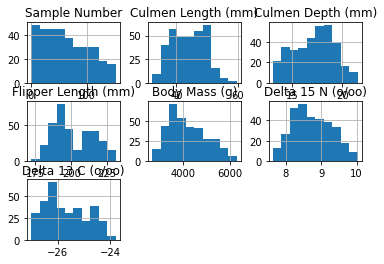

In [8]:
dataset.hist()
pyplot.show()

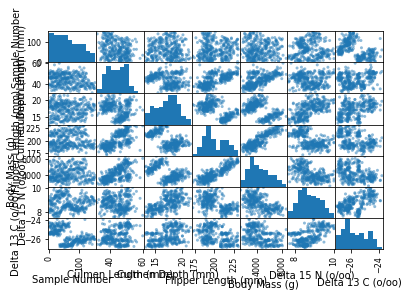

In [9]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

In [10]:
keep_cols = ['Species', 'Region', 'Island', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex']
dataset = dataset.loc[:, keep_cols]  
print(dataset.columns)  

Index(['Species', 'Region', 'Island', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex'],
      dtype='object')


In [11]:
print(dataset.isna().sum()) 

Species                 0
Region                  0
Island                  0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
dtype: int64


In [12]:
print(dataset['Species'].head())  

0    Adelie Penguin (Pygoscelis adeliae)
1    Adelie Penguin (Pygoscelis adeliae)
2    Adelie Penguin (Pygoscelis adeliae)
3    Adelie Penguin (Pygoscelis adeliae)
4    Adelie Penguin (Pygoscelis adeliae)
Name: Species, dtype: object


In [13]:
print(dataset['Species'].nunique())  

3


In [14]:
print(dataset['Species'].unique()) 

['Adelie Penguin (Pygoscelis adeliae)' 'Gentoo penguin (Pygoscelis papua)'
 'Chinstrap penguin (Pygoscelis antarctica)']


In [15]:
dataset['Sex'].fillna('Unknown', inplace=True) 
print(dataset.isna().sum()) 

Species                0
Region                 0
Island                 0
Culmen Length (mm)     2
Culmen Depth (mm)      2
Flipper Length (mm)    2
Body Mass (g)          2
Sex                    0
dtype: int64


In [16]:
dataset.dropna(inplace=True) 
print(dataset.isna().sum())

Species                0
Region                 0
Island                 0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
dtype: int64


In [17]:
dataset['Species'] = dataset['Species'].astype('category')

In [18]:
for col in ['Region','Island','Sex']:
    print(f'Column: {col}, number of unique values, {dataset[col].nunique()}, unique values: {dataset[col].unique()}')

print()
dataset.drop(columns=['Region'], inplace=True)
print(dataset.columns)
print()
print((dataset['Sex']=='.').value_counts())


Column: Region, number of unique values, 1, unique values: ['Anvers']
Column: Island, number of unique values, 3, unique values: ['Torgersen' 'Biscoe' 'Dream']
Column: Sex, number of unique values, 4, unique values: ['MALE' 'FEMALE' 'Unknown' '.']

Index(['Species', 'Island', 'Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)', 'Sex'],
      dtype='object')

False    341
True       1
Name: Sex, dtype: int64


In [19]:
dataset['Sex'] = dataset['Sex'].astype('category')
dataset['Island'] = dataset['Island'].astype('category')

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Species              342 non-null    category
 1   Island               342 non-null    category
 2   Culmen Length (mm)   342 non-null    float64 
 3   Culmen Depth (mm)    342 non-null    float64 
 4   Flipper Length (mm)  342 non-null    float64 
 5   Body Mass (g)        342 non-null    float64 
 6   Sex                  342 non-null    category
dtypes: category(3), float64(4)
memory usage: 14.8 KB


## Apply some algorithms to the data

To apply to an algorithm we need to do some initial processing. 

1. Separate the data from the inputs - place input data into X (4 attributes), and output labels into y.
2. Split the data into train/evaluate/model selection data (80%) and training data (20%).
3. Load this split data into appropriate variables.

In [21]:
# Split-out validation dataset
array = dataset.values
X = array[:,2:6] 
y = array[:,0] 
print(X)
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1) 

[[39.1 18.7 181.0 3750.0]
 [39.5 17.4 186.0 3800.0]
 [40.3 18.0 195.0 3250.0]
 ...
 [49.6 18.2 193.0 3775.0]
 [50.8 19.0 210.0 4100.0]
 [50.2 18.7 198.0 3775.0]]


In [22]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=20, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.992582 (0.022270)
LDA: 0.988736 (0.026832)
KNN: 0.817582 (0.100545)
CART: 0.959341 (0.054487)
NB: 0.963187 (0.054506)
SVM: 0.564286 (0.079454)


The box plot below helps describe the range of accuracies per model. SVM having the highest average accuracy (see above) and also the smallest range of values. 

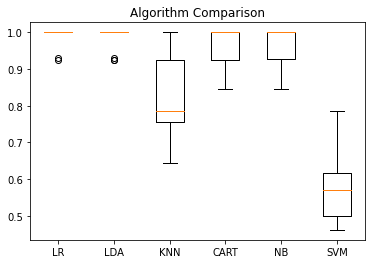

In [23]:
# Compare Algorithms - box plot explained here: https://www.mashupmath.com/blog/box-and-whisker-plots-explained
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

## Predictions 

In [24]:
# Make predictions on validation dataset
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

https://en.wikipedia.org/wiki/Precision_and_recall 

$Precision = True Positives / (True Positives + False Positives)$ 

$Recall = True Positives / ((True Positives + False Negatives)$

$Accuracy = (True Positives + True Negatives) / (True Positives + False Positives + True Negatives + False Negatives)$

$F1 = 2*(precision * recall) / (precision + recall)$

In [25]:

# Evaluate predictions
print(accuracy_score(Y_validation, predictions)) # simple accuracy score - 1 is best! 
print(confusion_matrix(Y_validation, predictions)) # shows errors against predictions
print(classification_report(Y_validation, predictions)) # nice little report on predictions

0.9710144927536232
[[28  1  0]
 [ 1 16  0]
 [ 0  0 23]]
                                           precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       0.97      0.97      0.97        29
Chinstrap penguin (Pygoscelis antarctica)       0.94      0.94      0.94        17
        Gentoo penguin (Pygoscelis papua)       1.00      1.00      1.00        23

                                 accuracy                           0.97        69
                                macro avg       0.97      0.97      0.97        69
                             weighted avg       0.97      0.97      0.97        69

